<a href="https://colab.research.google.com/github/SudhinaD/ML-Projects/blob/main/Finding_shortest_path_and_Decorator_task_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider a 3D Grid of points from (0,0,0) to (100,100,100) with unit increment in all axes. Assign higher weights to some of the points randomly, and zero weights for rest of points. User inputs two or more sets of {start, end points}. a. Starting from a given time, determine shortest path for each set, where velocity of travel for one grid to another is v m/s such that not two paths should not have a common point at any time. b. Plot the paths in 3D

Searching for path 1
No path found for pair 1.
Searching for path 2
Path 2 found with cost: 96.60210849265765


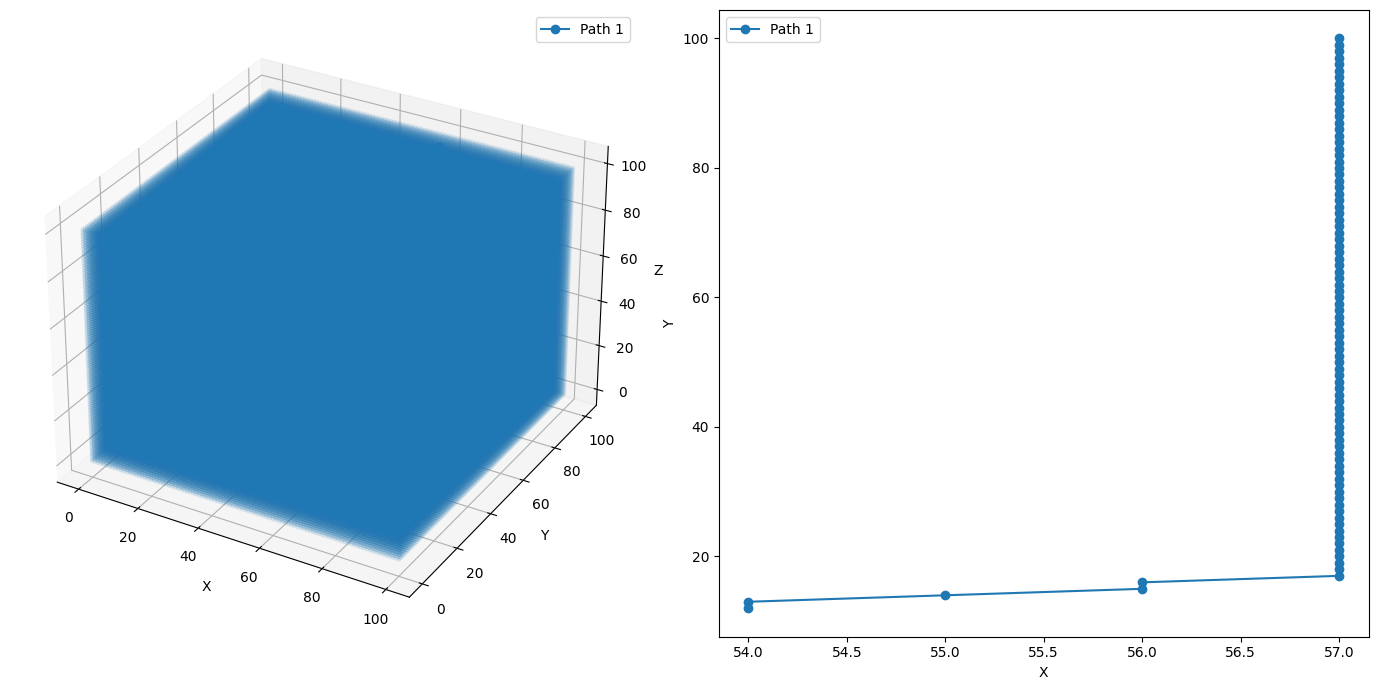

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue

# Parameters
grid_size = 101  # Grid from (0,0,0) to (100,100,100) inclusive
velocity = 1.0  # Velocity in m/s (for computing time)
num_paths = 2  # Number of start-end point pairs to process
mode = "minimalis tavolsag"  # Mode for heuristic function

# Generates a 3D grid with random weights
def generate_grid_with_weights(size):
    weights = np.random.choice([0, 1], size=(size, size, size), p=[0.7, 0.3])  # 70% zeros (free), 30% ones (obstacle)
    grid = np.array([(x, y, z, weights[x, y, z]) for x in range(size) for y in range(size) for z in range(size)])
    return grid

# Plot function to display the paths and grid
def create_plot(paths, points):
    x_points, y_points, z_points, _ = np.array(points).T
    fig = plt.figure(figsize=(14, 7))

    # 3D plot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(x_points, y_points, z_points, marker='.', alpha=0.1)

    for i, path in enumerate(paths):
        path = np.array(path)
        x_path, y_path, z_path = path.T
        ax1.plot(x_path, y_path, z_path, marker='o', label=f'Path {i+1}')

    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()

    # 2D Plot: X-Y projection of the paths
    ax2 = fig.add_subplot(122)
    for i, path in enumerate(paths):
        x_path, y_path, _ = np.array(path).T
        ax2.plot(x_path, y_path, marker='o', label=f'Path {i+1}')

    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Heuristic functions for A* search
def distance3D(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2 + (point1[2] - point2[2]) ** 2)

def distance3D_manhattan(point1, point2):
    return abs(point1[0] - point2[0]) + abs(point1[1] - point2[1]) + abs(point1[2] - point2[2])

# Heuristic for A* search based on the mode
def heuristic(mode, point1, point2):
    if mode == "minimalis tavolsag":
        return distance3D(point1, point2)
    elif mode == "minimalis lepesszam":
        return distance3D_manhattan(point1, point2)

# Retrieve neighbors of the current point within the grid bounds
def get_neighbors(point, points_set, grid_size):
    neighbors = []
    x, y, z = point[:3]
    for dx in range(-1, 2):
        for dy in range(-1, 2):
            for dz in range(-1, 2):
                nx, ny, nz = x + dx, y + dy, z + dz
                if 0 <= nx < grid_size and 0 <= ny < grid_size and 0 <= nz < grid_size:
                    neighbor = (nx, ny, nz)
                    if neighbor in points_set and neighbor != (x, y, z):
                        neighbors.append(points_set[neighbor])
    return neighbors

# A* Search Algorithm for shortest path computation
def a_star_search(points, start, finish):
    points_set = {tuple(point[:3]): point for point in points}
    start_p = tuple(start)
    finish_p = tuple(finish)

    pq = PriorityQueue()
    pq.put((0, start_p))
    optpath = {}
    cost = {start_p: 0}
    optpath[start_p] = None

    while not pq.empty():
        current_point = pq.get()[1]

        if current_point == finish_p:
            correctpath = reconstruct_path(optpath, start_p, finish_p)
            return correctpath, cost[finish_p]

        for neighbor in get_neighbors(current_point, points_set, grid_size):
            neighbor_tuple = tuple(neighbor[:3])
            newcost = cost[current_point] + heuristic(mode, current_point, neighbor)

            if (neighbor_tuple not in cost or newcost < cost.get(neighbor_tuple, float('inf'))) and neighbor[3] == 0:
                cost[neighbor_tuple] = newcost
                priority = newcost + heuristic(mode, neighbor, finish_p)
                pq.put((priority, neighbor_tuple))
                optpath[neighbor_tuple] = current_point

    return None, None

# Reconstructs the path from start to finish
def reconstruct_path(optpath, start_p, finish_p):
    current = finish_p
    path = []
    while current != start_p:
        if current is None:
            return None  # Path does not exist
        path.append(current)
        current = optpath.get(current)
    path.append(start_p)
    return path[::-1]

# Paths collision check based on time
def paths_collide(path1, path2, velocity=1.0):
    time_step = 1 / velocity  # Assuming unit distance per second at velocity
    for i in range(min(len(path1), len(path2))):
        if path1[i] == path2[i]:  # If positions overlap in time
            return True
    return False

# Main logic
def main():
    points = generate_grid_with_weights(grid_size)

    start = np.random.randint(0, grid_size, size=(num_paths, 3))
    finish = np.random.randint(0, grid_size, size=(num_paths, 3))

    paths = []
    for i in range(num_paths):
        print(f"Searching for path {i+1}")
        path, cost = a_star_search(points, start[i], finish[i])
        if path:
            print(f"Path {i+1} found with cost: {cost}")
            paths.append(path)
        else:
            print(f"No path found for pair {i+1}.")

    create_plot(paths, points)

if __name__ == "__main__":
    main()


Write a decorator which wraps functions to log function arguments and the return value on each call. Provide support for both positional and named arguments (your wrapper function should take both *args and **kwargs and print them both):

In [1]:
import functools

def logged(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        # Log function call with arguments
        args_str = ', '.join(repr(arg) for arg in args)
        kwargs_str = ', '.join(f"{k}={v!r}" for k, v in kwargs.items())
        if kwargs_str:
            call_str = f"{func.__name__}({args_str}, {kwargs_str})"
        else:
            call_str = f"{func.__name__}({args_str})"
        print(f"You called {call_str}")

        # Call the actual function
        result = func(*args, **kwargs)

        # Log the return value
        print(f"It returned {result!r}")
        return result

    return wrapper

# Example usage
@logged
def func(*args):
    return 3 + len(args)

# Call the decorated function
func(8, 8, 8)


You called func(8, 8, 8)
It returned 6


6